In [41]:
# get clean file
clean_file = "./dev_test_audio/clean_train_p234_001.wav"
# get noise file
noise_file = "./dev_test_audio/noise_train_AirConditioner_1.wav"

In [42]:
# extract metadata
import wave

#get metadata about the wave file
with wave.open(clean_file, 'r') as file:
    clean_file_params = file.getparams()
print("clean params: ", clean_file_params)

with wave.open(noise_file, 'r') as file:
    noise_file_params = file.getparams()
print("noise params: ", noise_file_params)

clean params:  _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=46240, comptype='NONE', compname='not compressed')
noise params:  _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=335031, comptype='NONE', compname='not compressed')


In [49]:
# create combined wave file (speech + noise)

import wave
import numpy as np

def mix_waves(file1, file2, output_file):
    # Open wave files
    with wave.open(file1, 'rb') as wave1, wave.open(file2, 'rb') as wave2:

        # Read frames
        frames1 = wave1.readframes(wave1.getnframes())
        frames2 = wave2.readframes(wave2.getnframes())

        # Convert frames to numpy arrays
        samples1 = np.frombuffer(frames1, dtype=np.int16)
        samples2 = np.frombuffer(frames2, dtype=np.int16)

        # Handle different file lengths
        min_len = min(len(samples1), len(samples2))
        samples1 = samples1[:min_len]
        samples2 = samples2[:min_len]

        # Mix audio samples
        mixed_samples = (samples1 / 2 + samples2 / 3).astype(np.int16)

        # Open output file
        with wave.open(output_file, 'wb') as output:
            output.setparams(wave1.getparams())
            output.writeframes(mixed_samples.tobytes())

# Example usage
mix_waves(clean_file, noise_file, './dev_test_audio/mixed.wav')


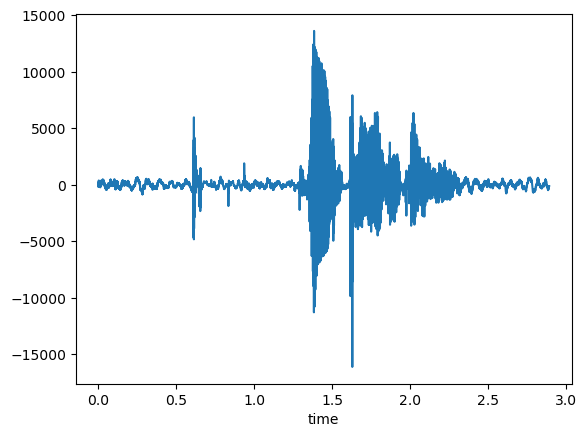

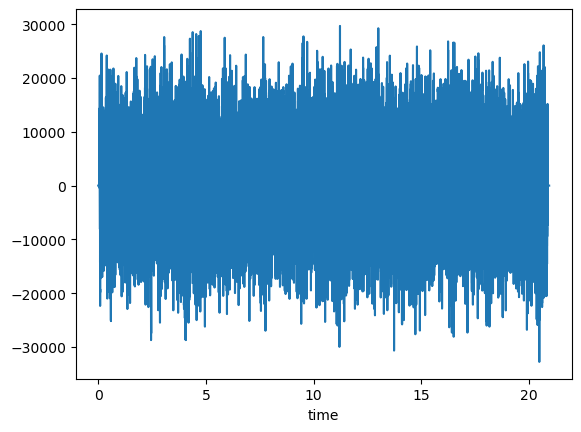

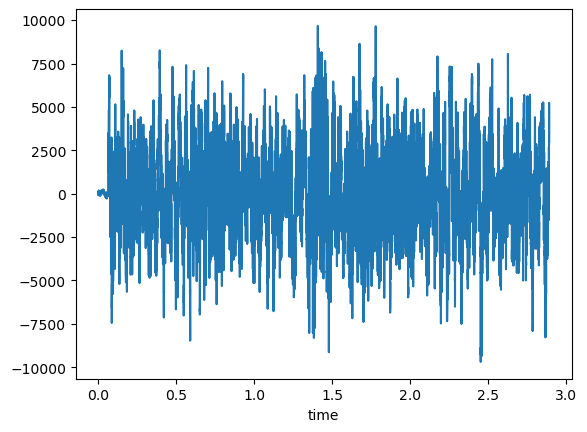

In [50]:
# plot individuals (visualize soundwave)
# visualize soundwave

import matplotlib.pyplot as plt
import numpy as np
import wave, sys

def visualize(raw):
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype="int16")
    f_rate = raw.getframerate()
    time = np.linspace(
        0,
        len(signal) / f_rate,
        num = len(signal)
    )

    plt.figure(1)
    #plt.title(path)
    plt.xlabel("time")
    plt.plot(time, signal)
    plt.show()

clean_wav = wave.open(clean_file)
visualize(clean_wav)

noise_wav = wave.open(noise_file)
visualize(noise_wav)

combined_wav = wave.open('./dev_test_audio/mixed.wav')
visualize(combined_wav)